In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as keras

2023-08-18 17:00:47.007504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
try:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
  # Invalid device or cannot modify virtual devices once initialized.
  pass

In [3]:
df_intensity_back = pd.read_csv('./data/August_17_night_NN_intensity_NN_back.csv')
df_intensity_forw = pd.read_csv('./data/August_17_night_NN_intensity_NN_forw.csv')

df_averaged_velocity = pd.read_csv('./data/August_17_night_all_averaged_velocities_NN_4096_to_1024_overnight.csv')

In [4]:
df_intensity_back = np.loadtxt('./data/August_17_night_NN_intensity_NN_back.csv')
df_intensity_forw = np.loadtxt('./data/August_17_night_NN_intensity_NN_forw.csv')

df_averaged_velocity = np.loadtxt('./data/August_17_night_all_averaged_velocities_NN_4096_to_1024_overnight.csv')

In [5]:
input1 = df_intensity_back.transpose()
input2 = df_intensity_forw.transpose()

output = df_averaged_velocity.transpose()

input_all = np.stack((input1, input2), axis=2)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(input_all, output, test_size=0.2, shuffle=False, random_state=42)

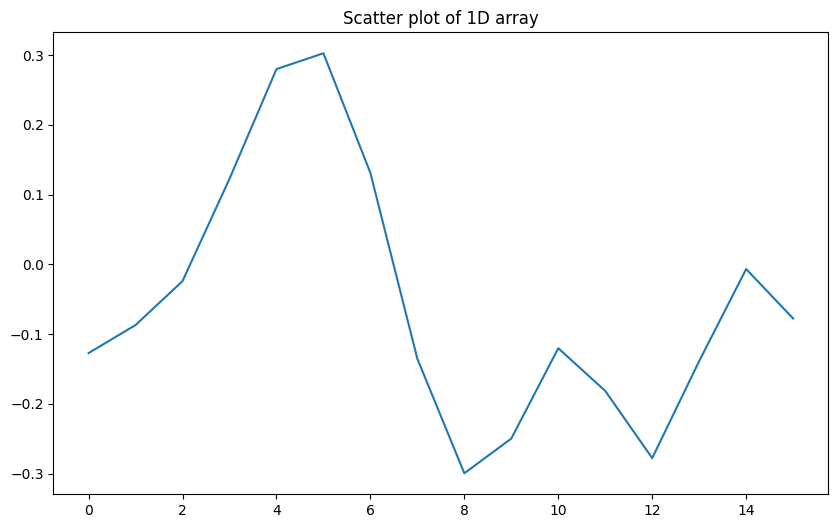

In [7]:
# Assuming y_train is your 1D array
plt.figure(figsize=(10,6))
plt.plot(output[200,:])
plt.title('Scatter plot of 1D array')
plt.show()

In [15]:
model = keras.Sequential([
    keras.layers.Normalization(),
    keras.layers.Flatten(input_shape=(1024, 2)),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Normalization(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Normalization(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Normalization(),
    keras.layers.Dense(16, activation='relu')
])

In [19]:
# # Initialize a Sequential model
# model = tf.keras.models.Sequential()

# # Flatten the input data 
# model.add(tf.keras.layers.Flatten(input_shape=(1024, 2)))

# # Add Dense layers
# model.add(tf.keras.layers.Dense(1024, activation='relu')) 
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(512, activation='relu')) 

# # Final output layer
# model.add(tf.keras.layers.Dense(16)) # Assuming your output is of shape (16,)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error') # or another suitable loss function

epochs = 1500

batch_size = 200

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split= 0.2)

Epoch 1/1500
2/2 [==============================] - 1s 65ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 2/1500
2/2 [==============================] - 0s 15ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 3/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 4/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 5/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 6/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 7/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 8/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 9/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 10/1500
2/2 [==============================] - 0s 16ms/step - loss: 0.0480 - val_loss: 0.0537
Epoch 11/

KeyboardInterrupt: 

In [21]:
# Evaluate the model loss on the TEST SET
loss = model.evaluate(X_test, y_test)
print("Test loss:", loss)

# Make predictions using the trained model on the TEST SET
predictions = model.predict(X_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.0490
Test loss: 0.04903220757842064
4/4 [==============================] - 0s 723us/step


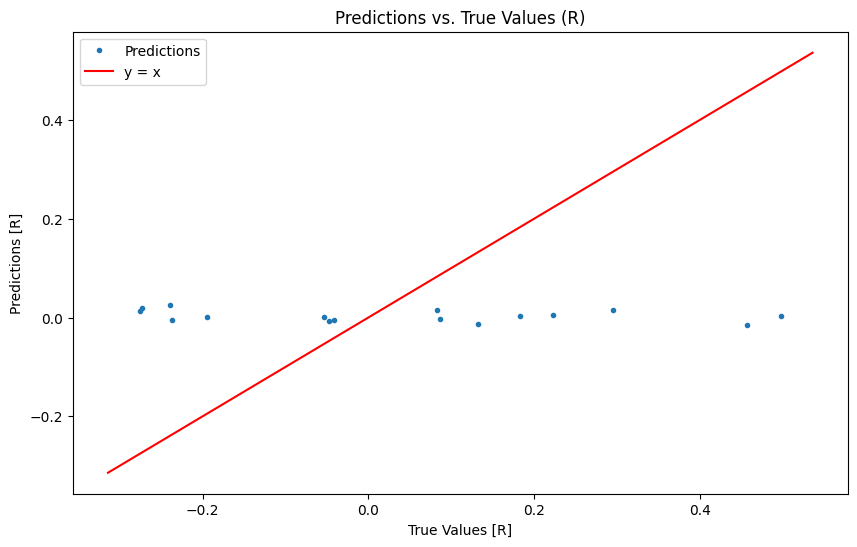

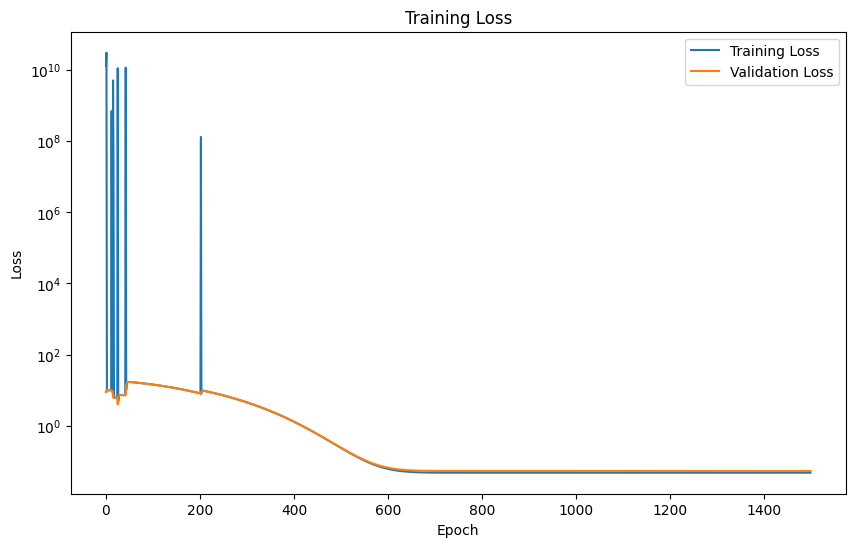

In [22]:
# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[10,], predictions[10,], '.', label='Predictions')
plt.xlabel('True Values [R]')
plt.ylabel('Predictions [R]')
plt.title('Predictions vs. True Values (R)')

# Make a 45 degree line in the same scale and range
x = np.linspace(*plt.gca().get_xlim())
plt.plot(x, x,'-', color='red', label= 'y = x')
plt.legend()
plt.show()

# Plot the loss vs. epochs
plt.figure(figsize=(10, 6))
plt.semilogy(history.history['loss'], label='Training Loss')
plt.semilogy(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')
plt.show()

4/4 [==============================] - 0s 822us/step


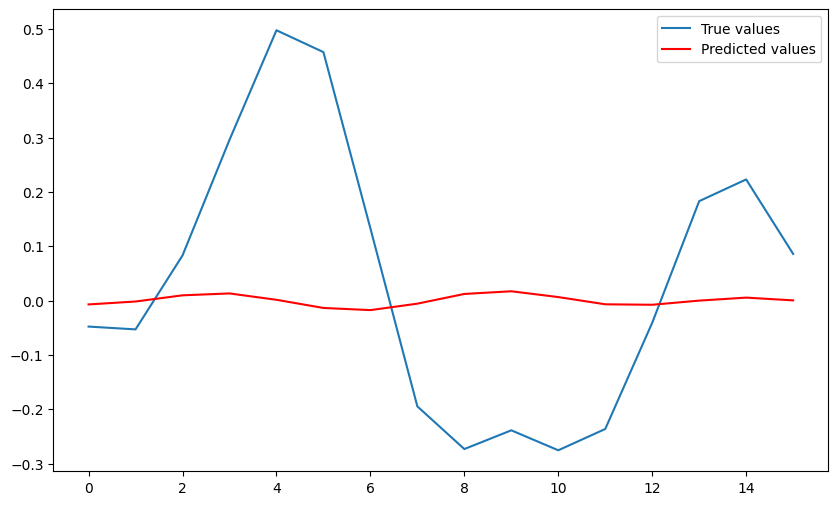

In [33]:
y_test_pred = model.predict(X_test)

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[10,], '-', label='True values')
plt.plot(y_test_pred[10,:], 'r', label='Predicted values')
plt.legend()
plt.show()

In [20]:
model = tf.keras.models.Sequential()

# Add a Conv1D layer
# The input_shape for our dataset is (1024, 2)
model.add(tf.keras.layers.Conv1D(1024, 3, activation='relu', input_shape=(1024, 2)))

# Add a MaxPooling1D layer
model.add(tf.keras.layers.MaxPooling1D(2))

# Add another Conv1D layer
model.add(tf.keras.layers.Conv1D(64, 3, activation='relu'))

# Add a MaxPooling1D layer
model.add(tf.keras.layers.MaxPooling1D(2))

# Flatten the tensor output from the convolutional layers
model.add(tf.keras.layers.Flatten())

# Add a dense layer for classification
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(16))  # Assuming your output is of shape (16,)


model.compile(optimizer='adam', 
              loss='mean_squared_error') # or another suitable loss function)

epochs = 1000

model.fit(input_all, output, epochs=epochs, validation_split=0.2)

Epoch 1/1000
13/13 [==============================] - 2s 43ms/step - loss: 5.3785 - val_loss: 0.0487
Epoch 2/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 3/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 4/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 5/1000
13/13 [==============================] - 0s 14ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 6/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 7/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0492 - val_loss: 0.0487
Epoch 8/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0491 - val_loss: 0.0487
Epoch 9/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0491 - val_loss: 0.0487
Epoch 10/1000
13/13 [==============================] - 0s 13ms/step - loss: 0.0491 - val_lo

KeyboardInterrupt: 